In [116]:
# 04. Preparing Time Series Features and Labels
# 05. Training a Single Layer Neural Network with Time Series Data
# 06. Training a Deep Neural Network with Time Series Data
# 07. Predicting time series with DNN
# 08. Using a Simple RNN for forecasting
# 09. Using a multi-layer LSTM for forecasting
# 10. Using RNNsRNN's and LSTM's to predict time series
# 11. LSTMs
# 12. Predicting Sunspots with DNN
# 13. Predicting Sunspots with RNN and CNN

In [ ]:
# Generate the synthetic data

# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

In [39]:
# Split the Dataset

# Define the split time
split_time = 1000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
# Plot the train set
plot_series(time_train, x_train)

In [ ]:
# Plot the validation set
plot_series(time_valid, x_valid)

In [ ]:
# Generate the naive forecast
naive_forecast = series[split_time - 1:-1]

# Define time step
time_step = 100

# Print values
print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step + 1]}')

In [ ]:
# Plot the results
plot_series(time_valid, (x_valid, naive_forecast))

In [ ]:
# Zooming in
plot_series(time_valid, (x_valid, naive_forecast), start=0, end=150)

# 04. Preparing Time Series Features and Labels

In [51]:
import tensorflow as tf

# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Preview the result
for val in dataset:
   print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [52]:
# Windowing the data

# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data
dataset = dataset.window(size=5, shift=1)

# Print the result
for window_dataset in dataset:
  print(window_dataset)

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>


In [53]:
# Print the result
for window_dataset in dataset:
  print([item.numpy() for item in window_dataset])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]
[6, 7, 8, 9]
[7, 8, 9]
[8, 9]
[9]


In [54]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(size=5, shift=1, drop_remainder=True)

# Print the result
for window_dataset in dataset:
  print([item.numpy() for item in window_dataset])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]


In [56]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Print the results
for window in dataset:
  print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [15]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Print the results
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  print()

x =  [0 1 2 3]
y =  4

x =  [1 2 3 4]
y =  5

x =  [2 3 4 5]
y =  6

x =  [3 4 5 6]
y =  7

x =  [4 5 6 7]
y =  8

x =  [5 6 7 8]
y =  9



In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Shuffle the windows
dataset = dataset.shuffle(buffer_size=10)

# Print the results
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  print()

x =  [4 5 6 7]
y =  8

x =  [0 1 2 3]
y =  4

x =  [1 2 3 4]
y =  5

x =  [3 4 5 6]
y =  7

x =  [5 6 7 8]
y =  9

x =  [2 3 4 5]
y =  6



In [24]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Shuffle the windows
dataset = dataset.shuffle(buffer_size=10)

# Create batches of windows
dataset = dataset.batch(2)

# Optimize the dataset for training
dataset = dataset.cache().prefetch(1)

# Print the results
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  print()

x =  [[0 1 2 3]
 [5 6 7 8]]
y =  [4 9]

x =  [[1 2 3 4]
 [4 5 6 7]]
y =  [5 8]

x =  [[2 3 4 5]
 [3 4 5 6]]
y =  [6 7]



# 05. Training a Single Layer Neural Network with Time Series Data

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

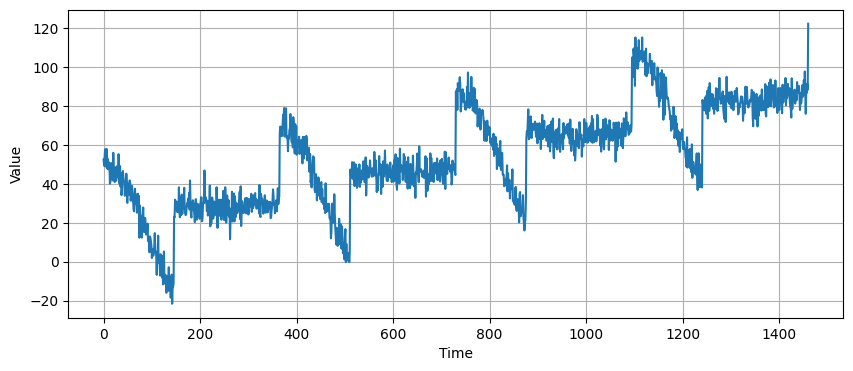

In [57]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

In [58]:
# Define the split time
split_time = 1000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

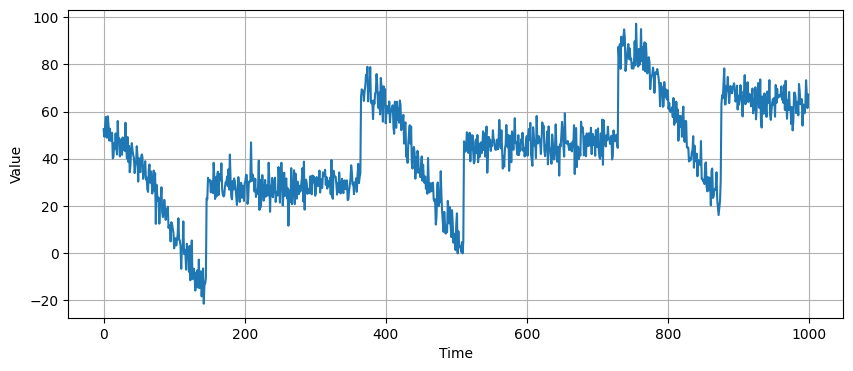

In [59]:
# Plot the train set
plot_series(time_train, x_train)

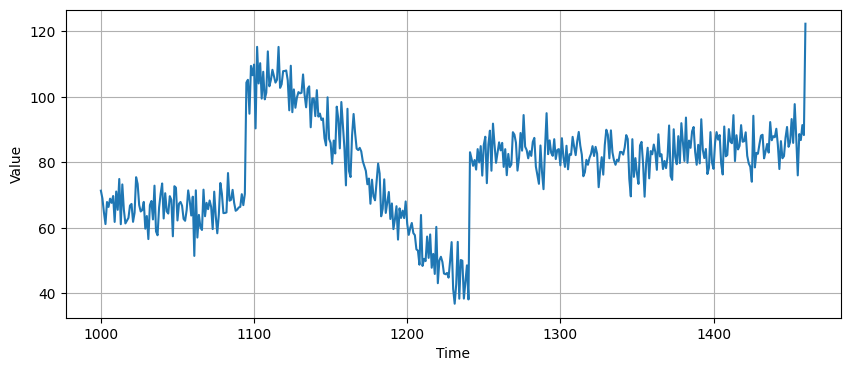

In [60]:
# Plot the validation set
plot_series(time_valid, x_valid)

In [63]:
# Prepare features and labels

# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [61]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size)
    
    # Optimize the dataset for training
    dataset = dataset.cache().prefetch(1)
    
    return dataset

In [64]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [65]:
# Print properties of a single batch
for windows in dataset.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')
  print(f'shape of first element: {windows[0].shape}')
  print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 20)
shape of second element: (32,)


In [68]:
# Build the single layer neural network
l0 = tf.keras.layers.Dense(1)
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(window_size,)),
    l0 
])

In [69]:
# Print the initial layer weights
print("Layer weights: \n {} \n".format(l0.get_weights()))

Layer weights: 
 [array([[-0.0589464 ],
       [-0.4235739 ],
       [ 0.4405098 ],
       [ 0.138228  ],
       [-0.16407135],
       [ 0.1254282 ],
       [ 0.5322972 ],
       [ 0.37167585],
       [ 0.41075587],
       [ 0.16813934],
       [ 0.34705812],
       [ 0.3190168 ],
       [ 0.45614004],
       [-0.06738546],
       [-0.06828761],
       [-0.11672109],
       [ 0.5206432 ],
       [-0.11302623],
       [ 0.5126905 ],
       [-0.51637095]], dtype=float32), array([0.], dtype=float32)] 



In [70]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [71]:
# Set the training parameters
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [73]:
# Train the model
model.fit(dataset,epochs=50)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 52.1919
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 51.8962
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 51.6115
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 51.3374
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 51.0735
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 50.8192
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 50.5742
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 50.3380
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 50.1104
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 49.8910
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 49.6794
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 49.4753
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 49.2785
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 49.0887
Epoch 15/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9

In [74]:
# Shape of the first 20 data points slice
print(f'shape of series[0:20]: {series[0:20].shape}')

# Shape after adding a batch dimension
print(f'shape of series[0:20][np.newaxis]: {series[0:20][np.newaxis].shape}')

# Shape after adding a batch dimension (alternate way)
print(f'shape of series[0:20][np.newaxis]: {np.expand_dims(series[0:20], axis=0).shape}')

# Sample model prediction
print(f'model prediction: {model.predict(series[0:20][np.newaxis])}')

shape of series[0:20]: (20,)
shape of series[0:20][np.newaxis]: (1, 20)
shape of series[0:20][np.newaxis]: (1, 20)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
model prediction: [[44.472607]]


In [76]:
len(series) - window_size

1441

In [82]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis], verbose=0))

# Slice the points that are aligned with the validation set
forecast = forecast[split_time - window_size:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')

length of the forecast list: 461
shape of the validation set: (461,)


In [ ]:
, (x_valid, results)

In [105]:
# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Overlay the results with the validation set
# plot_series(time_valid, (x_valid, results))

shape after converting to numpy array: (461, 1, 1)
shape after squeezing: (461,)


In [85]:
# Compute the metrics
print(tf.keras.metrics.mse(x_valid, results).numpy())
print(tf.keras.metrics.mae(x_valid, results).numpy())

46.08248
4.9369593


# 06. Training a Deep Neural Network with Time Series Data

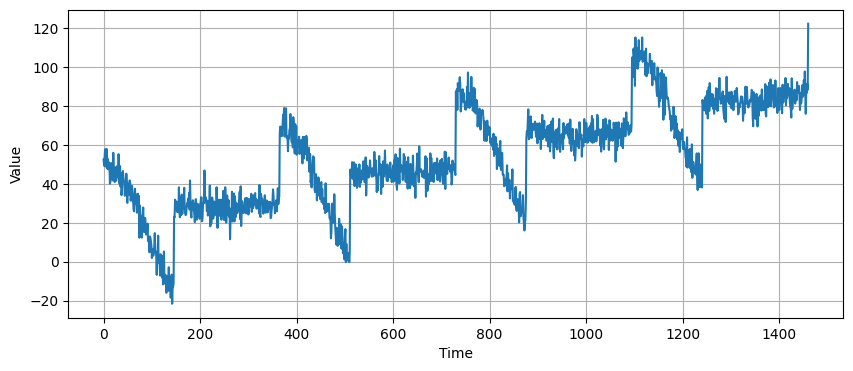

In [106]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

In [107]:
# Define the split time
split_time = 1000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [108]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [109]:
# Build the model
model_baseline = tf.keras.models.Sequential([
    tf.keras.Input(shape=(window_size,)),
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_baseline.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331 (1.29 KB)

 Trainable params: 331 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
# Set the training parameters
model_baseline.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [112]:
# Train the model
model_baseline.fit(dataset,epochs=100)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 48.9259
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 48.7620
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 48.5950
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 48.4472
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 48.2885
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 48.1431
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 48.0017
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 47.8576
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 47.7235
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 47.5966
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 47.4473
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 47.3201
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 47.1885
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 47.0658
Epoch 15/100
31/31 ━━━━━━━━━━

In [113]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_baseline.predict(forecast_series[time:time + window_size][np.newaxis], verbose=0))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# # Plot the results
# plot_series(time_valid, (x_valid, results))

In [114]:
# Compute the metrics
print(tf.keras.metrics.mse(x_valid, results).numpy())
print(tf.keras.metrics.mae(x_valid, results).numpy())

43.492485
4.8574405
